In [44]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [45]:
aml_df = pd.read_csv('../data_files/aml.normal.meta.filtered.csv', index_col=0)
#allergy_df = pd.read_csv('../data_files/allergy.allergy.normal.csv', index_col=0)
#diabetes_df = pd.read_csv('../data_files/diabetes.diabetes.normal.csv', index_col=0)
#diabetes_control_df = pd.read_csv('../data_files/diabetes_control.diabetes_control.normal.csv', index_col=0)
control_df = pd.read_csv('geuvadis.normal.meta.filtered.csv', index_col=0)

In [46]:
master_df = aml_df.append([control_df])

In [47]:
master_df.shape

(1841, 51)

In [48]:
master_df.columns

Index(['Assay_Type', 'AssemblyName', 'AvgSpotLen', 'BioProject', 'BioSample',
       'Center_Name', 'Consent', 'DATASTORE_filetype', 'DATASTORE_provider',
       'ENA_FIRST_PUBLIC', 'ENA_LAST_UPDATE', 'Experiment', 'InsertSize',
       'Instrument', 'LibraryLayout', 'LibrarySelection', 'LibrarySource',
       'Library_Name', 'LoadDate', 'MBases', 'MBytes', 'Organism', 'Platform',
       'ReleaseDate', 'SRA_Sample', 'SRA_Study', 'Sample_Name', 'Strain',
       'alignment_count', 'alpha_dup_count',
       'alpha_dup_read_covers_snps_count',
       'alpha_dup_read_covers_snps_count_exact', 'alpha_dup_zero_edit_count',
       'alpha_read_covers_snps_count', 'alpha_read_covers_snps_count_exact',
       'alpha_wt_count', 'alpha_wt_zero_edit_count', 'beta_count',
       'beta_read_covers_snps_count', 'beta_read_covers_snps_count_exact',
       'beta_zero_edit_count', 'cell_type', 'file_location',
       'norm_alpha_dup_read_covers_snps_count_exact',
       'norm_alpha_read_covers_snps_count_e

In [49]:
master_df.describe()

,AssemblyName,AvgSpotLen,InsertSize,MBases,MBytes,alignment_count,alpha_dup_count,alpha_dup_read_covers_snps_count,alpha_dup_read_covers_snps_count_exact,alpha_dup_zero_edit_count,...,alpha_wt_count,alpha_wt_zero_edit_count,beta_count,beta_read_covers_snps_count,beta_read_covers_snps_count_exact,beta_zero_edit_count,norm_alpha_dup_read_covers_snps_count_exact,norm_alpha_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact,total_spots
count,0.0,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,...,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1.841000e+03
mean,NaN,182.043455,101.140684,5599.058664,3220.103205,2364.135796,895.657795,26.757740,21.942966,680.699620,...,906.718631,671.363389,561.759370,44.648017,36.566540,365.278653,1.011564,0.550419,1.417120,3.173521e+07
std,NaN,23.889198,134.535442,3150.217681,1500.760968,8197.883344,3968.338575,190.714808,159.727858,3408.379995,...,3789.703622,3220.229993,1479.951524,130.670699,110.003068,998.178965,7.299550,2.451475,4.201169,1.589499e+07
min,NaN,150.000000,0.000000,1005.000000,627.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.272381e+06
25%,NaN,150.000000,0.000000,3015.000000,2049.000000,7.000000,2.000000,0.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.773076e+07
50%,NaN,200.000000,0.000000,4546.000000,3089.000000,157.000000,20.000000,0.000000,0.000000,11.000000,...,21.000000,11.000000,36.000000,1.000000,1.000000,27.000000,0.000000,0.000000,0.016612,2.890669e+07
75%,NaN,200.000000,280.000000,8573.000000,4278.000000,1690.000000,373.000000,0.000000,0.000000,174.000000,...,403.000000,185.000000,409.000000,29.000000,23.000000,267.000000,0.000000,0.045372,0.726130,4.572494e+07
max,NaN,200.000000,280.000000,33842.000000,23763.000000,128617.000000,66448.000000,3108.000000,2727.000000,59756.000000,...,62044.000000,55942.000000,17553.000000,1573.000000,1430.000000,12437.000000,74.326065,33.294673,42.564971,1.774319e+08


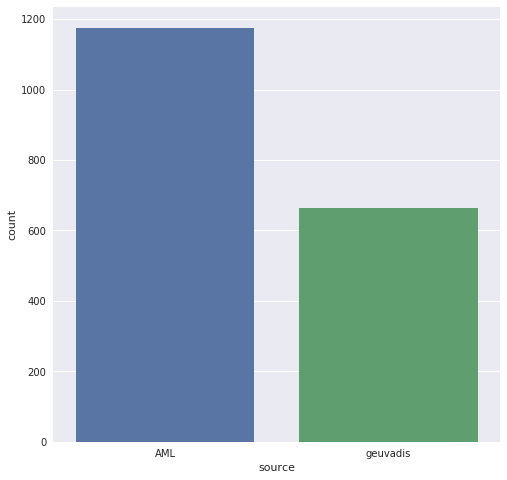

In [50]:
#How many of each type do we have?
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='source', data=master_df)

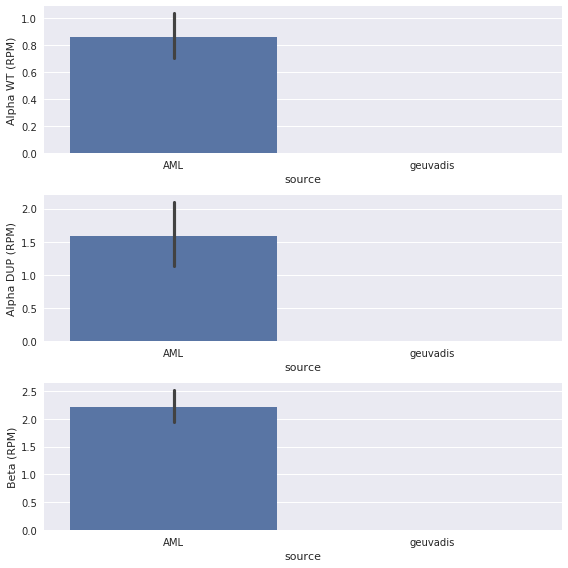

In [51]:
#What are the expression levels of each type?
fig, ax = plt.subplots(3,1,figsize=(8,8))
sns.barplot(x='source', y='norm_alpha_read_covers_snps_count_exact', data=master_df, ax=ax[0])
sns.barplot(x='source', y='norm_alpha_dup_read_covers_snps_count_exact', data=master_df, ax=ax[1])
sns.barplot(x='source', y='norm_beta_read_covers_snps_count_exact', data=master_df, ax=ax[2])

ax[0].set_ylabel('Alpha WT (RPM)')
ax[1].set_ylabel('Alpha DUP (RPM)')
ax[2].set_ylabel('Beta (RPM)')
plt.tight_layout()

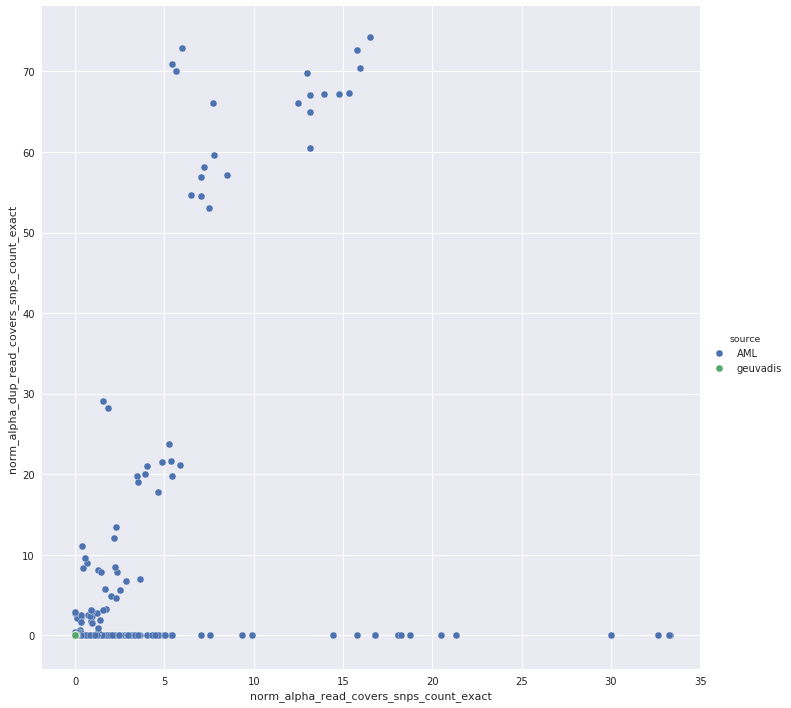

In [52]:
plot = sns.pairplot(x_vars=["norm_alpha_read_covers_snps_count_exact"], y_vars=["norm_alpha_dup_read_covers_snps_count_exact"], data=master_df, hue="source", size=10)

axes = plot.axes

#axes[0,0].set_ylim(-2,80)
#axes[0,0].set_xlim(-2,40)

In [53]:
#Ones with highest alpha dup expression

#master_df[master_df['norm_alpha_dup_read_covers_snps_count_exact'] > 40].sort_values('norm_alpha_dup_read_covers_snps_count_exact', ascending=False)

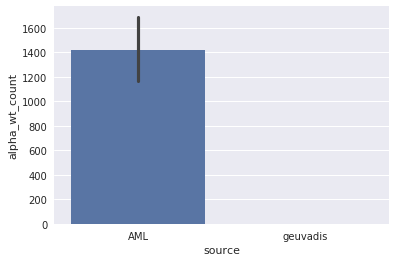

In [54]:
sns.barplot(x='source', y='alpha_wt_count', data=master_df)

In [55]:
control_df.describe()

,AvgSpotLen,InsertSize,MBases,MBytes,alignment_count,alpha_wt_count,alpha_dup_count,beta_count,alpha_wt_zero_edit_count,alpha_dup_zero_edit_count,...,alpha_read_covers_snps_count,alpha_dup_read_covers_snps_count,beta_read_covers_snps_count,alpha_read_covers_snps_count_exact,alpha_dup_read_covers_snps_count_exact,beta_read_covers_snps_count_exact,total_spots,norm_alpha_read_covers_snps_count_exact,norm_alpha_dup_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact
count,665.000000,665.0,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,...,665.000000,665.0,665.000000,665.000000,665.0,665.000000,6.650000e+02,665.000000,665.0,665.000000
mean,150.288722,280.0,3802.410526,2647.765414,5.885714,1.926316,1.905263,2.054135,1.753383,1.732331,...,0.004511,0.0,0.003008,0.004511,0.0,0.003008,2.651988e+07,0.000097,0.0,0.000134
std,0.703440,0.0,1396.586683,983.063784,6.325188,2.413376,2.395098,2.127010,2.173760,2.155951,...,0.067065,0.0,0.054800,0.067065,0.0,0.054800,9.710164e+06,0.001540,0.0,0.002731
min,150.000000,280.0,1235.000000,867.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,8.639677e+06,0.000000,0.0,0.000000
25%,150.000000,280.0,2709.000000,1862.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.893928e+07,0.000000,0.0,0.000000
50%,150.000000,280.0,3779.000000,2660.000000,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.630470e+07,0.000000,0.0,0.000000
75%,150.000000,280.0,4565.000000,3209.000000,8.000000,3.000000,3.000000,3.000000,2.000000,2.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,3.185266e+07,0.000000,0.0,0.000000
max,152.000000,280.0,11919.000000,7977.000000,59.000000,23.000000,23.000000,24.000000,21.000000,21.000000,...,1.000000,0.0,1.000000,1.000000,0.0,1.000000,8.332160e+07,0.032553,0.0,0.066677


In [56]:
master_df['source'].value_counts()

AML         1176
geuvadis     665
Name: source, dtype: int64

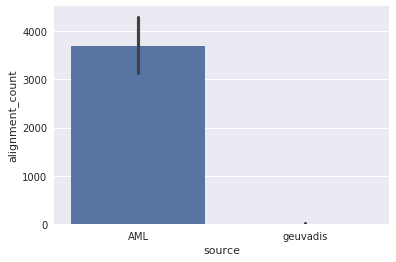

In [57]:
sns.barplot(x='source', y='alignment_count', data=master_df)

In [61]:
control_df[['alignment_count']].sort_values('alignment_count', ascending=False).head(50)

,alignment_count
ERR204940,59
ERR188469,47
ERR188275,46
ERR188296,34
ERR188150,34
ERR188455,32
ERR188437,31
ERR188223,31
ERR188084,30
ERR188259,29


In [68]:
grouped = master_df.groupby('source')

In [70]:
grouped.mean()

,AssemblyName,AvgSpotLen,InsertSize,MBases,MBytes,alignment_count,alpha_dup_count,alpha_dup_read_covers_snps_count,alpha_dup_read_covers_snps_count_exact,alpha_dup_zero_edit_count,...,alpha_wt_count,alpha_wt_zero_edit_count,beta_count,beta_read_covers_snps_count,beta_read_covers_snps_count_exact,beta_zero_edit_count,norm_alpha_dup_read_covers_snps_count_exact,norm_alpha_read_covers_snps_count_exact,norm_beta_read_covers_snps_count_exact,total_spots
source,,,,,,,,,,,,,,,,,,,,,
AML,NaN,200.000000,0.0,6615.020408,3543.746599,3697.670068,1401.053571,41.888605,34.35119,1064.639456,...,1418.357143,1050.011905,878.259354,69.893707,57.242347,570.853741,1.583579,0.861613,2.218392,3.468435e+07
geuvadis,NaN,150.288722,280.0,3802.410526,2647.765414,5.885714,1.905263,0.000000,0.00000,1.732331,...,1.926316,1.753383,2.054135,0.003008,0.003008,1.735338,0.000000,0.000097,0.000134,2.651988e+07
